https://stepik.org/lesson/501479/step/1?unit=493164  
https://drive.google.com/drive/folders/15UoRIwvCOZ-6c624m5NTDfbFizOs-C0N  
https://www.kaggle.com/c/advanced-dls-spring-2021/  

https://github.com/yurkai/churn/blob/master/week07.ipynb  
https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix  
https://github.com/yurkai/churn/blob/master/week07.ipynb  
https://stackoverflow.com/questions/52356473/how-to-print-categories-in-pandas-cut  
https://stackoverflow.com/questions/44511636/matplotlib-plot-feature-importance-with-feature-names  
https://stackoverflow.com/questions/23455728/scikit-learn-balanced-subsampling  

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

In [ ]:
coef = np.abs(model['clf'].coef_[0])
cols = model['pre'].transformers_[0][1].get_feature_names(feature_cols)
idx = np.argsort(coef)
cols = [cols[i] for i in idx]
plt.figure(figsize=(6,4))
plt.barh(cols, np.abs(coef)[idx]);

In [5]:
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

target_col = 'Churn'

In [43]:
# no missing values in cat_cols (the same for test.csv)
data = pd.read_csv('./train.csv')
for c in cat_cols: print(f'{c}: {data[c].unique()}')

Sex: ['Male' 'Female']
IsSeniorCitizen: [0 1]
HasPartner: ['Yes' 'No']
HasChild: ['Yes' 'No']
HasPhoneService: ['Yes' 'No']
HasMultiplePhoneNumbers: ['No' 'Yes' 'No phone service']
HasInternetService: ['No' 'Fiber optic' 'DSL']
HasOnlineSecurityService: ['No internet service' 'No' 'Yes']
HasOnlineBackup: ['No internet service' 'No' 'Yes']
HasDeviceProtection: ['No internet service' 'No' 'Yes']
HasTechSupportAccess: ['No internet service' 'Yes' 'No']
HasOnlineTV: ['No internet service' 'No' 'Yes']
HasMovieSubscription: ['No internet service' 'No' 'Yes']
HasContractPhone: ['One year' 'Two year' 'Month-to-month']
IsBillingPaperless: ['No' 'Yes']
PaymentMethod: ['Mailed check' 'Credit card (automatic)' 'Electronic check'
 'Bank transfer (automatic)']


In [94]:
np.arange(17.5,125,5).shape

(22,)

In [107]:
def create_age_bins(col):

    # Defining / instantiating the necessary variables
    age_bins = np.arange(17.5,125,5)
    age_labels = range(len(age_bins))
    age_imputer = SimpleImputer(strategy = 'median')
    age_ohe = OneHotEncoder()

    # Performing basic imputation for nulls
    imputed = age_imputer.fit_transform(col)
    ages_filled = pd.DataFrame(data = imputed, columns = ['MonthlySpending'])

    # Segregating ages into age bins
    age_cat_cols = pd.cut(ages_filled['MonthlySpending'], bins = age_bins, labels = age_labels)
    age_cats = pd.DataFrame(data = age_cat_cols, columns = ['MonthlySpending'])

    # One hot encoding new age bins
    ages_encoded = age_ohe.fit_transform(age_cats[['MonthlySpending']])
    ages_encoded = pd.DataFrame(data = ages_encoded.toarray())

    return ages_encoded

In [169]:
data = pd.read_csv('./train.csv')
bins = np.arange(17.5,125,5)
labels = range(len(bins)-1)
pd.cut(data['MonthlySpending'], bins=bins, labels=labels)
data['MonthlySpending'] = pd.cut(data['MonthlySpending'], bins=bins, labels=labels)
pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(data[['MonthlySpending']]).toarray())

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5278,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [201]:
# https://towardsdatascience.com/data-science-quick-tip-004-using-custom-transformers-in-scikit-learn-pipelines-89c28c72f22a
# ('0', StandardScaler(), ['MonthlySpending']),
# ('0', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), cat_cols),
# df = pd.DataFrame(OneHotEncoder(handle_unknown='ignore').fit_transform(df[['MonthlySpending']]).toarray())
# ('1', FunctionTransformer(cut_, kw_args={'bins': np.arange(17.5,125,5)}), ['MonthlySpending']),
# ('2', OneHotEncoder(handle_unknown='ignore'), cat_cols + ['MonthlySpending']),

def cut_(df, bins):
    for c in df.columns:
        df[c] = pd.cut(df[c], bins=bins, labels=range(len(bins)-1))
    return df

In [252]:
data = pd.read_csv('./train.csv')
train_data, test_data = train_test_split(data, test_size=0.2, stratify=data[target_col], random_state=42)

preprocessor = ColumnTransformer([
    # ('1', StandardScaler(), ['MonthlySpending']),
    # ('1', KBinsDiscretizer(n_bins=11, encode='onehot', strategy='quantile'), ['MonthlySpending']),
    ('1', FunctionTransformer(cut_, kw_args={'bins': np.arange(17.5,125,5)}), ['MonthlySpending']),
    ('2', OneHotEncoder(handle_unknown='ignore'), cat_cols + ['MonthlySpending']),
    # ('2', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('3', SimpleImputer(missing_values=0, strategy='median'), ['ClientPeriod']),
    ('4', KBinsDiscretizer(n_bins=11, encode='onehot', strategy='quantile'), ['ClientPeriod'])
])

classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')
model = Pipeline([('pre', preprocessor), ('clf', classifier)])

feature_cols = cat_cols + ['ClientPeriod','MonthlySpending']
shuffle = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)
s = cross_val_score(model, train_data[feature_cols], train_data[target_col], scoring='roc_auc', cv=shuffle)
print(f'train roc_auc score: {s.mean():.4f} ({s.std():.4f})')

model.fit(train_data[feature_cols], train_data[target_col])
score = roc_auc_score(test_data[target_col], model.predict_proba(test_data[feature_cols])[:,1])
print(f'test roc_auc score: {score:.4f}')

data = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')
submission['Churn'] = model.predict_proba(data[feature_cols])[:,1]
submission.to_csv('./my_submission.csv', index=False)

train roc_auc score: 0.8446 (0.0301)
test roc_auc score: 0.8496


In [246]:
grid = {'clf__C': np.arange(0.1,1.1,0.1), 'clf__penalty': ['l1']}
shuffle = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)
cv = GridSearchCV(model, grid, scoring='roc_auc', cv=shuffle)
cv.fit(train_data[feature_cols], train_data[target_col])
params = cv.best_estimator_.get_params()
params['clf__C'], params['clf__penalty']

(0.7000000000000001, 'l1')

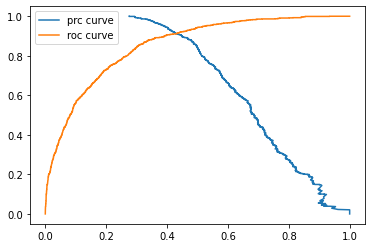

In [379]:
y = train_data[target_col]
p = model.predict(train_data[feature_cols])
scores = model.predict_proba(train_data[feature_cols])[:,1]
precision, recall, thresholds = precision_recall_curve(y, scores)
fpr, tpr, thresholds = roc_curve(y, scores)
plt.plot(precision, recall, label='prc curve')
plt.plot(fpr, tpr, label='roc curve')
plt.legend();

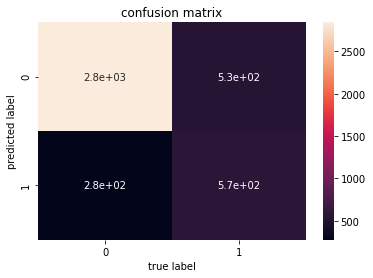

In [381]:
mat = confusion_matrix(y, p)
sns.heatmap(mat.T, annot=True)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('confusion matrix');

In [189]:
num_cols_ = [
    #'TotalSpent',
    #'ClientPeriod',
    #'MonthlySpending'
]

cat_cols_ = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    #'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    #'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    #'IsBillingPaperless',
    'PaymentMethod',
    #'TotalSpentG',
    'ClientPeriodG',
    'MonthlySpendingG'
]

target_col = 'Churn'
feature_cols_ = cat_cols_ + num_cols_

data = pd.read_csv('./train.csv')

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'] = data.groupby('HasContractPhone')['TotalSpent'].apply(lambda x: x.fillna(x.median()))
data['ClientPeriod'] = data.groupby('HasContractPhone')['ClientPeriod'].apply(lambda x: x.replace(0, x.mean()))

data['ClientPeriodG'] = pd.cut(data['ClientPeriod'], bins=[-1,0,2,5,10,17,25,33,43,53,62,70,72,100]).astype(str)
data['MonthlySpendingG'] = pd.cut(data['MonthlySpending'], bins=np.arange(17.5,125,5)).astype(str)
data['TotalSpentG'] = pd.cut(data['TotalSpent'], 5).astype(str)

train_data, test_data = train_test_split(data, test_size=0.15, stratify=data[target_col], random_state=42)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols_),
    ('sca', StandardScaler(), num_cols_),
    ('pol', PolynomialFeatures(), num_cols_)
])

classifier = LogisticRegression(C=1, penalty='l1', solver='liblinear')
model = Pipeline([('pre', preprocessor), ('clf', classifier)])
shuffle = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(model, train_data[feature_cols_], train_data[target_col], scoring='roc_auc', cv=shuffle)
print(f'train roc_auc score: {scores.mean():.4f} (std: {scores.std():.6f})')
print(f'{scores}')

model.fit(train_data[feature_cols_], train_data[target_col])
score = roc_auc_score(test_data[target_col], model.predict_proba(test_data[feature_cols_])[:,1])
print(f'test roc_auc score: {score:.4f}')

c = model['clf'].coef_
np.abs(c).min(), np.abs(c).max(), (c == 0).sum(), len(c[0])

train roc_auc score: 0.8420 (std: 0.017770)
[0.803843   0.82605356 0.84492294 0.87139638 0.8402376  0.84528138
 0.86492122 0.83668005 0.84186747 0.844682  ]
test roc_auc score: 0.8594


(0.0, 1.7043963144944307, 14, 67)

In [188]:
grid = {'clf__C':[0.5,1,10], 'clf__penalty':['l1','l2']}
cv = GridSearchCV(model, grid, scoring='roc_auc', cv=StratifiedKFold(10))
cv.fit(train_data[feature_cols_], train_data[target_col])
params = cv.best_estimator_.get_params()
params['clf__C'], params['clf__penalty']

(0.5, 'l1')

In [173]:
data = pd.read_csv('./test.csv')

data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data['TotalSpent'] = data.groupby('HasContractPhone')['TotalSpent'].apply(lambda x: x.fillna(x.median()))
data['ClientPeriod'] = data.groupby('HasContractPhone')['ClientPeriod'].apply(lambda x: x.replace(0, x.mean()))

data['ClientPeriodG'] = pd.cut(data['ClientPeriod'], bins=[-1,0,2,5,10,17,25,33,43,53,62,70,72,100]).astype(str)
data['MonthlySpendingG'] = pd.cut(data['MonthlySpending'], bins=np.arange(17.5,125,5)).astype(str)
data['TotalSpentG'] = pd.cut(data['TotalSpent'], 5).astype(str)

submission = pd.read_csv('./submission.csv')
submission['Churn'] = model.predict_proba(data[feature_cols_])[:,1]
submission.to_csv('./my_submission.csv', index=False)

In [176]:
data.shape

(5282, 23)

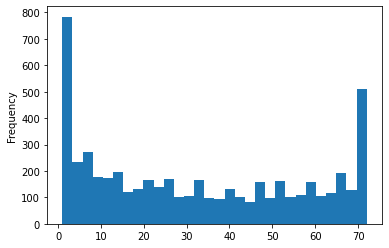

In [216]:
data['ClientPeriod'].plot.hist(bins=30);

In [210]:
def client_period(data):
    def na(x): return x.isnull().sum()
    def mode(x): return x.value_counts().index[0]
    funcs = ('size','mean','median',mode,'std','min','max',na)
    data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
    data['TotalSpent'] = data.groupby('HasContractPhone')['TotalSpent'].apply(lambda x: x.fillna(x.median()))
    display(data.groupby('HasContractPhone')['TotalSpent'].agg(funcs))
    data.hist(column='TotalSpent', by='HasContractPhone', layout=(1,3), figsize=(8,1));

,size,mean,median,mode,std,min,max,na
HasContractPhone,,,,,,,,
Month-to-month,2920,1380.004469,693.125,19.75,1618.852061,18.90,8061.50,0.0
One year,1082,3024.781701,2681.150,2681.15,2213.496736,18.80,8684.80,0.0
Two year,1280,3759.323594,3647.250,3647.25,2569.683224,20.45,8672.45,0.0


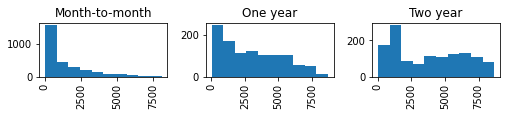

In [211]:
client_period(pd.read_csv('./train.csv'))

In [307]:
target_col = 'Churn'

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod',
    'ClientPeriodG',
    'MonthlySpendingG'
]

cols_to_drop = [
    'HasMultiplePhoneNumbers_No phone service',
    'HasOnlineSecurityService_No internet service',
    'HasOnlineBackup_No internet service',
    'HasDeviceProtection_No internet service',
    'HasTechSupportAccess_No internet service',
    'HasOnlineTV_No internet service',
    'HasMovieSubscription_No internet service',
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

data = pd.read_csv('./train.csv')
data['ClientPeriod'] = data.groupby('HasContractPhone')['ClientPeriod'].apply(lambda x: x.replace(0, x.median()))
data['ClientPeriodG'] = pd.cut(data['ClientPeriod'], bins=[-1,0,2,5,10,17,25,33,43,53,62,70,72,100]).astype(str)
data['MonthlySpendingG'] = pd.cut(data['MonthlySpending'], bins=np.arange(17.5,125,5)).astype(str)
# data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
# data['TotalSpent'] = data.groupby('HasContractPhone')['TotalSpent'].apply(lambda x: x.fillna(x.median()))
# data['Period'] = data['TotalSpent'] / data['MonthlySpending']

data = pd.get_dummies(data, columns=cat_cols)
data.drop(cols_to_drop, axis=1, inplace=True)

train_data, test_data = train_test_split(data, test_size=0.2, stratify=data[target_col], random_state=42)

model = LogisticRegression(C=0.2, penalty='l1', solver='liblinear')
shuffle = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
scores = cross_val_score(model, train_data.drop(target_col,axis=1), train_data[target_col], scoring='roc_auc', cv=shuffle)
print(f'train roc_auc score: {scores.mean():.4f} (std: {scores.std():.6f})')
print(f'{scores}')

model.fit(train_data.drop(target_col,axis=1), train_data[target_col])
score = roc_auc_score(test_data[target_col], model.predict_proba(test_data.drop(target_col,axis=1))[:,1])
print(f'test roc_auc score: {score:.4f}')

# c = model['clf'].coef_
# np.abs(c).min(), np.abs(c).max(), (c == 0).sum(), len(c[0])

train roc_auc score: 0.8458 (std: 0.023927)
[0.84363553 0.83064332 0.83264652 0.86589973 0.8891369  0.84118664
 0.87557604 0.83945221 0.85582751 0.83158508 0.85979021 0.80506993
 0.85407925 0.78519814 0.83088578 0.85716783 0.8266317  0.87540793
 0.8534965  0.86188811]
test roc_auc score: 0.8573


In [306]:
grid = {'C':[0.1,0.2,0.4,0.4,0.5,0.6,1], 'penalty':['l1','l2']}
cv = GridSearchCV(model, grid, scoring='roc_auc', cv=StratifiedKFold(30))
cv.fit(train_data.drop(target_col,axis=1), train_data[target_col])
params = cv.best_estimator_.get_params()
params['C'], params['penalty']

(0.2, 'l1')